In [132]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [133]:
iris  = load_iris()
dir(iris)
df = pd.DataFrame(iris.data, columns = iris["feature_names"])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [134]:
df["target"] = iris.target
df["target_name"] = df['target'].apply(lambda x: iris.target_names[x] )
df = df.drop(["petal length (cm)", "petal width (cm)"], axis=1)
df.head()

,sepal length (cm),sepal width (cm),target,target_name
0,5.1,3.5,0,setosa
1,4.9,3.0,0,setosa
2,4.7,3.2,0,setosa
3,4.6,3.1,0,setosa
4,5.0,3.6,0,setosa


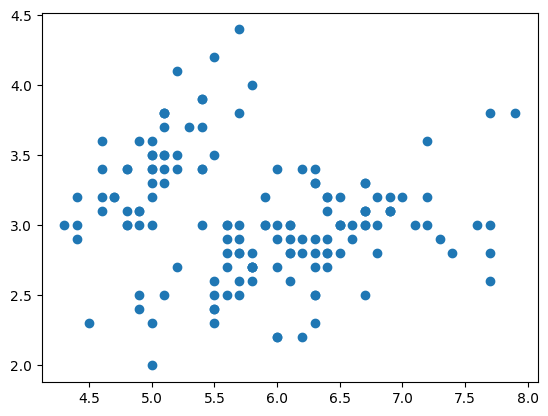

In [135]:
import matplotlib.pyplot as plt
plt.scatter(df["sepal length (cm)"],df["sepal width (cm)"])

Text(0.5, 1.0, 'SSE Vs K')

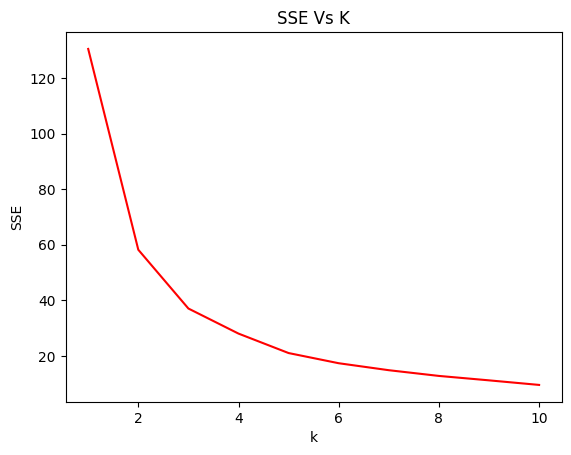

In [138]:
#finding the value of K
SSE = []
k_range = range(1,11)
for k in k_range:
  km = KMeans(n_clusters=k)
  y_pred=km.fit(df[["sepal length (cm)",'sepal width (cm)']])
  SSE.append(km.inertia_)
SSE
plt.plot(k_range, SSE, color = "red")
plt.xlabel("k")
plt.ylabel("SSE")
plt.title("SSE Vs K")

In [139]:
#k= 3 (Using the Elbow method)
km = KMeans(n_clusters=3)
df["clusters"]= km.fit_predict(df[["sepal length (cm)",'sepal width (cm)']])
df.head()

,sepal length (cm),sepal width (cm),target,target_name,clusters
0,5.1,3.5,0,setosa,2
1,4.9,3.0,0,setosa,2
2,4.7,3.2,0,setosa,2
3,4.6,3.1,0,setosa,2
4,5.0,3.6,0,setosa,2


In [140]:
df.clusters.unique()

array([2, 0, 1], dtype=int32)

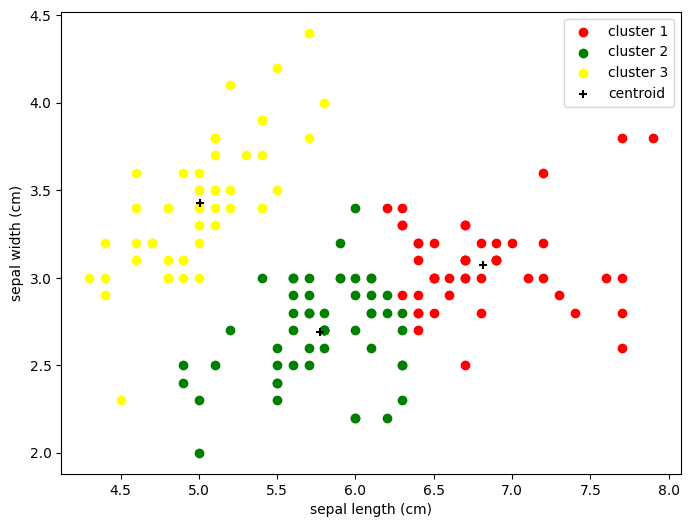

In [141]:
#Visualization
df_1 = df[df["clusters"]==0]
df_2 = df[df["clusters"]==1]
df_3 = df[df["clusters"]==2]
plt.figure(figsize =(8,6))
plt.scatter(df_1['sepal length (cm)'],df_1['sepal width (cm)'],color = "red", label = "cluster 1")
plt.scatter(df_2['sepal length (cm)'],df_2['sepal width (cm)'],color = "green", label = "cluster 2")
plt.scatter(df_3['sepal length (cm)'],df_3['sepal width (cm)'],color = "yellow",label = "cluster 3")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], color = "black", marker ="+", label="centroid")
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.legend()

We got this plot before standardization, now we will standardize the values and see how the visualization looks like, "+" shows the centroid for each cluster.

In [142]:
scaler = MinMaxScaler()
df["sepal length (cm)"] = scaler.fit_transform(df[["sepal length (cm)"]])
df["sepal width (cm)"] = scaler.fit_transform(df[["sepal width (cm)"]])
df.head()

,sepal length (cm),sepal width (cm),target,target_name,clusters
0,0.222222,0.625000,0,setosa,2
1,0.166667,0.416667,0,setosa,2
2,0.111111,0.500000,0,setosa,2
3,0.083333,0.458333,0,setosa,2
4,0.194444,0.666667,0,setosa,2


In [144]:
km_new = KMeans(n_clusters=3)
df["clusters_new"]=km_new.fit_predict(df[["sepal length (cm)","sepal width (cm)"]])
df.head()

,sepal length (cm),sepal width (cm),target,target_name,clusters,clusters_new
0,0.222222,0.625000,0,setosa,2,1
1,0.166667,0.416667,0,setosa,2,1
2,0.111111,0.500000,0,setosa,2,1
3,0.083333,0.458333,0,setosa,2,1
4,0.194444,0.666667,0,setosa,2,1


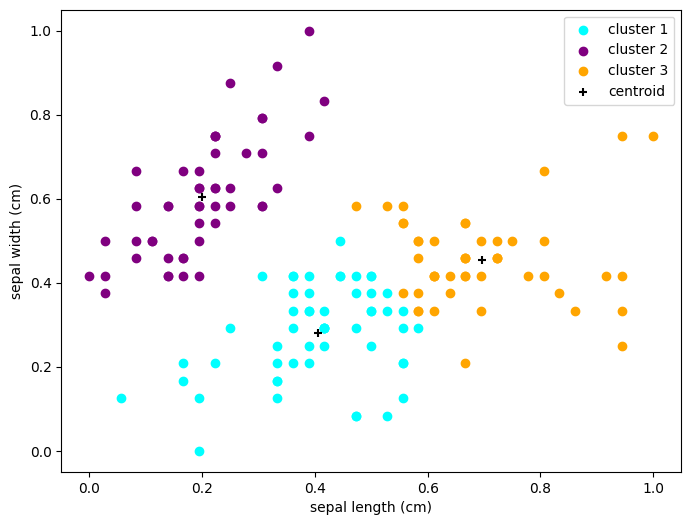

In [145]:
#Visualization
df1 = df[df["clusters_new"]==0]
df2 = df[df["clusters_new"]==1]
df3 = df[df["clusters_new"]==2]
plt.figure(figsize =(8,6))
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'],color = "cyan", label = "cluster 1")
plt.scatter(df2['sepal length (cm)'],df2['sepal width (cm)'],color = "purple", label = "cluster 2")
plt.scatter(df3['sepal length (cm)'],df3['sepal width (cm)'],color = "orange",label = "cluster 3")
plt.scatter(km_new.cluster_centers_[:,0],km_new.cluster_centers_[:,1], color = "black", marker ="+", label="centroid")
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.legend()

There is not much of a difference because the previous values were close to each other. When we standardize the values, we get values within a range that reflects the difference between sepal width and sepal length.